## 4 неделя. Центральная предельная теорема своими руками


Задание: 
Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 

- Сгенерируйте из него выборку объёма 1000
- постройте гистограмму выборки 
- нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины

_**Мой комментарий**: параметр **normed** устарел._

## Распределение Парето

$$ F_{X}(x  |  k , xm) = P (X < x) = 1 - \left(\frac{x_{m}}{x}\right)^k\\ $$

$$E(X) = \frac{kx_{m}}{k-1}$$

$$D(X) = \left(\frac{x_{m}}{k-1}\right)^2 \frac{k}{k-2} $$

Википедия: https://en.wikipedia.org/wiki/Pareto_distribution


Документация: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html

In [138]:
#импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

#зададим параметры распределению Парето
loc = 0
k = 3
xm = 3

distrv = sts.pareto(k, loc=0, scale=xm)

#генерация 1000 значений
distsample = distrv.rvs(1000)

#рассчитаем теоретическое распределение - посчитаем её характеристики
print('Теоретическое среднее: ', distrv.mean())
print('Теоретическая дисперсия: ', distrv.var())
print('Теоретическое стандартное отклонение: ', distrv.std())

Теоретическое среднее:  4.5
Теоретическая дисперсия:  6.75
Теоретическое стандартное отклонение:  2.598076211353316


Text(0, 0.5, 'pdf')

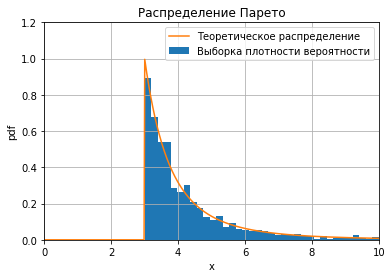

In [139]:
# гистограмма выборки
plt.hist(distsample, bins=100, density=True, histtype='stepfilled', label='Выборка плотности вероятности')

# теоретическая плотность распределения pdf
x = np.linspace(0, 20, 1000)
pdf = distrv.pdf(x)

plt.plot(x, pdf, label = 'Теоретическое распределение')
plt.legend()
plt.grid()
plt.axis([0, 10, 0, 1.2])
plt.title('Распределение Парето')
plt.xlabel('x')
plt.ylabel('pdf')

**Задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок.**

Для этого при трёх и более значениях n (например, 5, 10, 50) 

- сгенерируйте 1000 выборок объёма n
- постройте гистограммы распределений их выборочных средних

Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 

Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

---

### Сгенерируем 1000 выборок объёма samplevol = 5, 10, 50 и построим гистограммы

In [140]:
#количество выборок
samplenum = 1000

#объём выборок
samplevol = [5, 10, 50]

#зададим массив под выборочное среднее значение, заполненный нулями
distributionSamples = np.zeros( (len(samplevol), samplenum) )

#вычисление выборочных средних значений и занесение в массив
for i in range( len(samplevol) ):
    for j in range(samplenum):
        distributionSampleTemp = np.array( sts.pareto.rvs(k, loc = 0, scale = xm, size = samplevol[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionSamples[i, j] = distributionSampleTempMean
        
print(distributionSamples)

[[3.80539136 3.51380149 4.05286536 ... 3.87697251 4.91209238 4.10654261]
 [3.86914855 4.79147972 3.76875417 ... 5.16093915 4.66310203 3.66880155]
 [4.26385479 5.53144988 4.33570446 ... 4.07635685 4.47105524 4.99978331]]


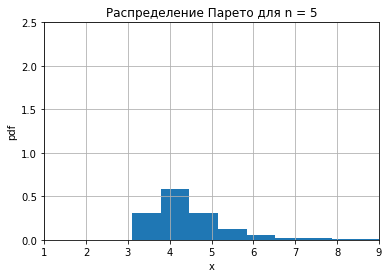

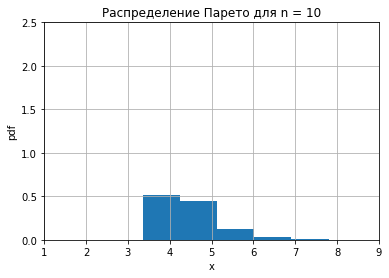

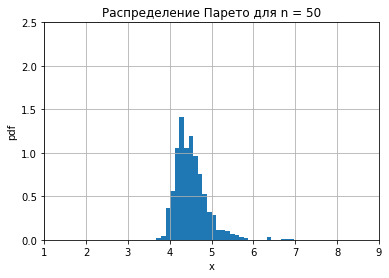

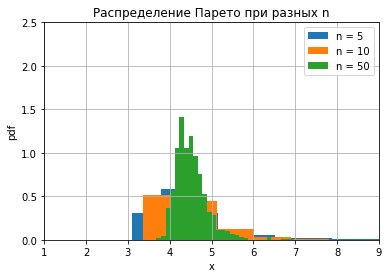

In [141]:
#построим гистограммы
for i in range( len(samplevol) ):
    plt.hist(distributionSamples[i], bins=30, density=True, histtype='stepfilled', ) #гистограмма
    plt.grid() #сетка
    plt.axis([1, 9, 0, 2.5]) #масштаб
    plt.title('Распределение Парето для n = ' + str(samplevol[i])) #название графиков
    plt.xlabel('x') #наименование оси х
    plt.ylabel('pdf') #наименование оси y
    plt.show()
    
for i in range( len(samplevol) ):
    plt.hist(distributionSamples[i], bins=30, density=True, histtype='stepfilled', label='n = ' + str(samplevol[i]))
    plt.grid()
    plt.axis([1, 9, 0, 2.5])
    plt.title('Распределение Парето при разных n')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

In [142]:
#Рассчитаем матожидание и дисперсии для выборок. Они - параметры нормальных распределений

distributionSampleMean = k * xm / (k - 1) #теоретическое среднее
distributionSampleVariance = np.zeros( len(samplevol) ) #теоретическая дисперсия
for i in range( len(samplevol) ):
    distributionSampleVariance[i] = xm**2 * k / ( (k - 1)**2 * (k - 2) ) / samplevol[i]
    
print ('Теоретическое матожидание: ' + str(distributionSampleMean))
for i in range( len(samplevol) ):
    print('Дисперсия для n = ' + str(samplevol[i]) + ': ' + str(distributionSampleVariance[i]))

Теоретическое матожидание: 4.5
Дисперсия для n = 5: 1.35
Дисперсия для n = 10: 0.675
Дисперсия для n = 50: 0.135


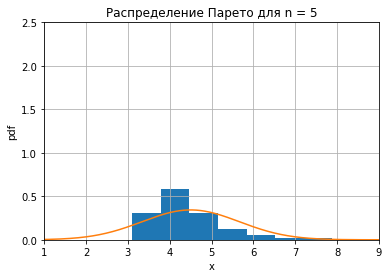

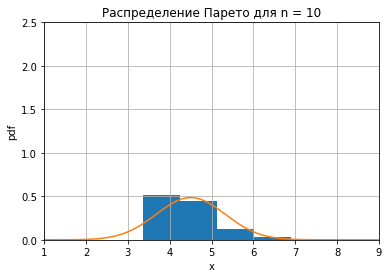

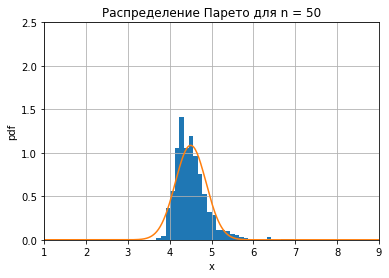

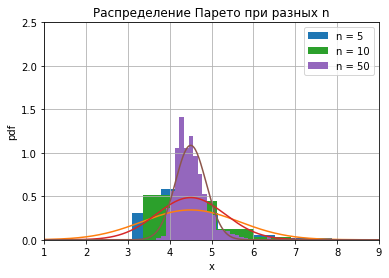

In [143]:
#гистограммы с поверх нарисованными нормальными распределениями для данных выборок

for i in range( len(samplevol) ):
    plt.hist(distributionSamples[i], bins=30, density=True, histtype='stepfilled')
    plt.grid()
    plt.axis([1, 9, 0, 2.5])
    plt.title('Распределение Парето для n = ' + str(samplevol[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормальное распределение с параметрами, рассчитанными для данных выборок
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normrv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normrv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
for i in range( len(samplevol) ):
    plt.hist(distributionSamples[i], bins=30, density=True, histtype='stepfilled', label='n = ' + str(samplevol[i]))
    plt.grid()
    plt.axis([1, 9, 0, 2.5])
    plt.title('Распределение Парето при разных n')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    mu = distributionSampleMean 
    sigma = sqrt( distributionSampleVariance[i] )
    normrv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10, 10, 1000)
    pdf = normrv.pdf(x)
    plt.plot(x, pdf)

# Итоги

*Как и утверждает ЦПТ, распределение выборочных средних с ростом n стремится к нормальному распределению.*

*Точность аппроксимации увеличивается с ростом n .*